# Global Terrorism Database. Prediction task.

This research project performed by Aleksander Kudryashov<br>
You can find me here:


*   [Telegram](https://t.me/harryhow)
*   [Github](https://github.com/htkg)



**Contributions to the project**


1.   Aleksander Kudryashov — Code
2.   Liya Ri — Idea



**TO DO**
* ~~Identify the task that you would like to solve (aka what is your numeric target variable, and what features you may use to predict it)~~
* ~~Fill in the google form describing your group and topic: here~~
* ~~Collect the dataset. You can use Kaggle, World Bank or other sources that you find relevant~~
* ~~Split the dataset into train and test~~
* ~~Perform EDA on train dataset (draw barplot, scatter plots, histogram, boxplot, etc. relevant to your task). Calculate the correlation.~~ Provide an intuitive explanation of what you observe. You may need to create your own features, ~~solve all issues with missing data, etc.~~
* ~~Train several models on your dataset (Linear model, Lasso, Ridge, Decision Trees), select optimal hyperparameters using cross-validation.~~
* ~~Report performance on the test dataset~~
* ~~Report contribution of each team member~~
* ~~Make the presentation and the report, showing how you've fulfilled all the points above~~

## Libraries imports


In [ ]:
# Essential
import numpy as np
import pandas as pd
# Plots
import matplotlib.pylab as plt
import seaborn as sns
# Stats
import scipy.stats as ss
from math import sqrt
# Debugging
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV, cross_val_score # Hyperoptimization, CVS, and spliting into train and test dataset.


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder # Scalers and Encoders
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest, chi2 #  Select features according to the k highest scores. Compute chi-squared stats between each non-negative feature and class.

In [ ]:
# Linear Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# Trees
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
# Ensemble
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# Neural Networks
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
# Yandex Catboost Installation
!pip install catboost
from catboost import CatBoostRegressor, CatBoostClassifier, CatBoost

## Inspecting Global Terrorism Database 

### Download dataset and supplied files.

Magic cell that downloads **all files** for you.

In [ ]:
# Dataset (155M)
!wget https://cdn-35.anonfiles.com/L0Q1HdA0oc/82c33486-1592435702/globalterrorismdb.csv

# Weights for Neural Network (2.74M)
!wget https://cdn-32.anonfiles.com/pdP2HcA2o3/1e839d66-1592435446/Weights-004--2.25121.hdf5

--2020-06-17 23:05:10--  https://cdn-35.anonfiles.com/L0Q1HdA0oc/82c33486-1592435702/globalterrorismdb.csv
Resolving cdn-35.anonfiles.com (cdn-35.anonfiles.com)... 45.148.16.59, 2a0c:dd45:1:1::12
Connecting to cdn-35.anonfiles.com (cdn-35.anonfiles.com)|45.148.16.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162812896 (155M) [text/plain]
Saving to: ‘globalterrorismdb.csv’

globalterrorismdb.c 100%[===================>] 155.27M  1.17MB/s    in 2m 57s  

2020-06-17 23:08:08 (898 KB/s) - ‘globalterrorismdb.csv’ saved [162812896/162812896]

--2020-06-17 23:08:10--  https://cdn-32.anonfiles.com/pdP2HcA2o3/1e839d66-1592435446/Weights-004--2.25121.hdf5
Resolving cdn-32.anonfiles.com (cdn-32.anonfiles.com)... 45.148.16.53, 2a0c:dd45:1:1::6
Connecting to cdn-32.anonfiles.com (cdn-32.anonfiles.com)|45.148.16.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2876008 (2.7M) [application/x-hdf]
Saving to: ‘Weights-004--2.25121.hdf5.2’

Weigh

In [ ]:
train_data = pd.read_csv('/content/globalterrorismdb.csv', index_col=0, encoding = "ISO-8859-1") # We have to open it in ISO-8859 encoding because dataset broken in ANSI and UTF-8

**---- OR ----**

Download [dataset](https://www.kaggle.com/START-UMD/gtd) manually from Kaggle and upload the file to the root of Google Drive. 

Also download [weights](https://anonfiles.com/pdP2HcA2o3/Weights-004-2.25121_hdf5) (VPN may be required).


In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/globalterrorismdb.csv', index_col=0, encoding = "ISO-8859-1") # We have to open it in ISO-8859 encoding because dataset broken in ANSI and UTF-8

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### First Touch of the Data

Let's examine the data first

In [ ]:
print("There is {} observations and {} features in train set.".format(*train_data.shape))

There is 181691 observations and 134 features in train set.


That's a lot of features. Let's take a closer look and perform EDA.

We can see descriptions of features [here](https://start.umd.edu/gtd/downloads/Codebook.pdf).

### Exploratory Data Analysis

**Inspecting data**

Number of casualties by year from 1970 to 2017:

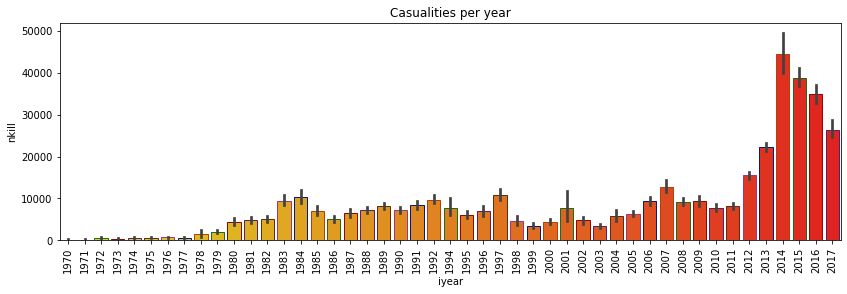

In [ ]:
plt.subplots(figsize=(14,4))
ax = sns.barplot(x="iyear", y="nkill", data=train_data, estimator = sum, palette='autumn_r',edgecolor=sns.color_palette('dark',7)).set_title('Casualities per year')
plt.xticks(rotation=90)
plt.show()

# Credits: https://www.kaggle.com/fredericoguerra/predicting-death-occurrence-in-terrorist-attacks
# I decided to take that was made more prettier than mine was before.

Number of casualties by country:

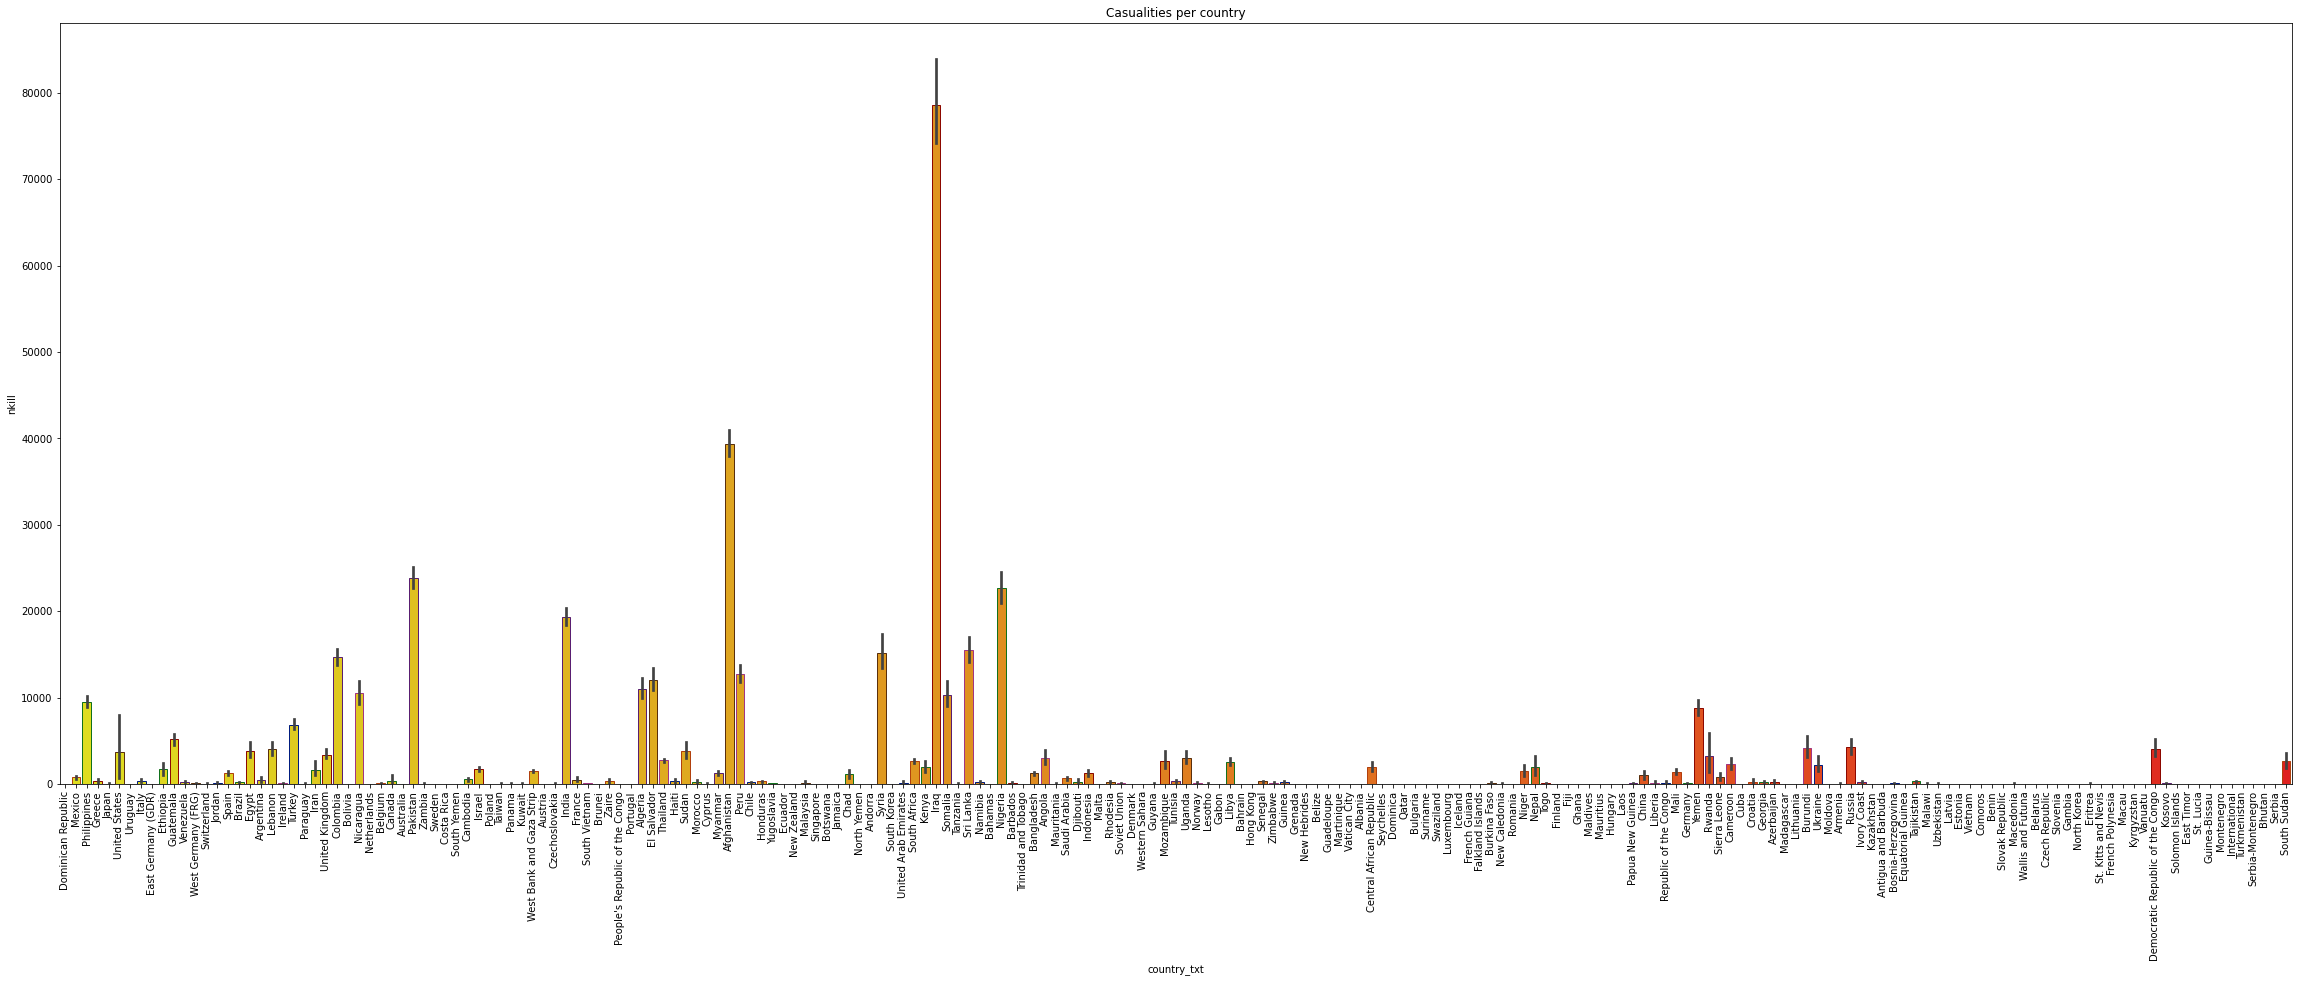

In [ ]:
plt.subplots(figsize=(40,14))
ax = sns.barplot(x=train_data.country_txt, y=train_data['nkill'], estimator = sum, palette='autumn_r',edgecolor=sns.color_palette('dark',7)).set_title('Casualities per country')
plt.xticks(rotation=90)
plt.show()

# Credits: https://www.kaggle.com/fredericoguerra/predicting-death-occurrence-in-terrorist-attacks

Top Terrorist Organizations (including unknown)

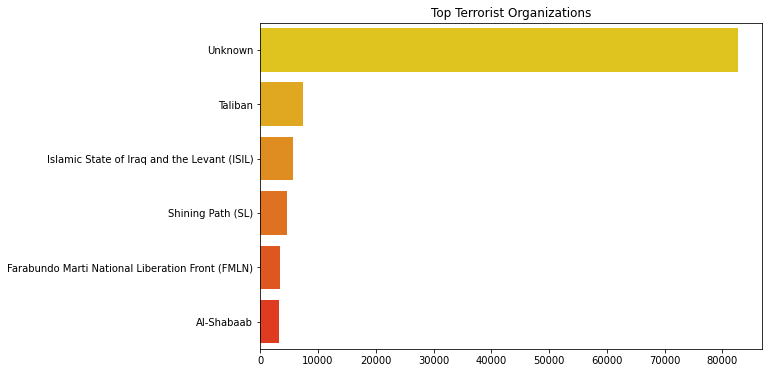

In [ ]:
f, ax = plt.subplots(figsize=(9, 6)) 
sns.barplot( y = train_data['gname'].value_counts().head(6).index,
            x = train_data['gname'].value_counts().head(6).values,
                palette='autumn_r')
ax.set_ylabel('')
ax.set_title('Top Terrorist Organizations' );

Top Terrorist Organizations

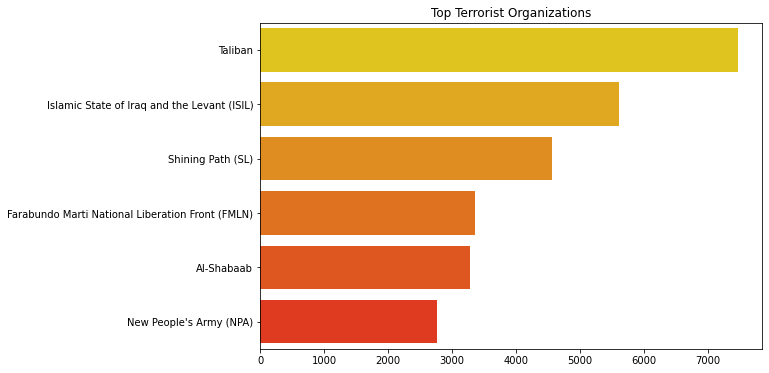

In [ ]:
only_terror = train_data[(train_data.gname != 'Unknown')]
f, ax = plt.subplots(figsize=(9, 6)) 
sns.barplot( y = only_terror['gname'].value_counts().head(6).index,
            x = only_terror['gname'].value_counts().head(6).values,
                palette='autumn_r')
ax.set_ylabel('')
ax.set_title('Top Terrorist Organizations' );

Most terrorist attacks were in:

In [ ]:
train_data['country_txt'].describe()

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object

How much died?

In [ ]:
train_data.nkill.describe()

count    181691.000000
mean          2.266860
std          11.227057
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: nkill, dtype: float64

How much wounded?

In [ ]:
train_data.nwound.describe()

count    165380.000000
mean          3.167668
std          35.949392
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8191.000000
Name: nwound, dtype: float64

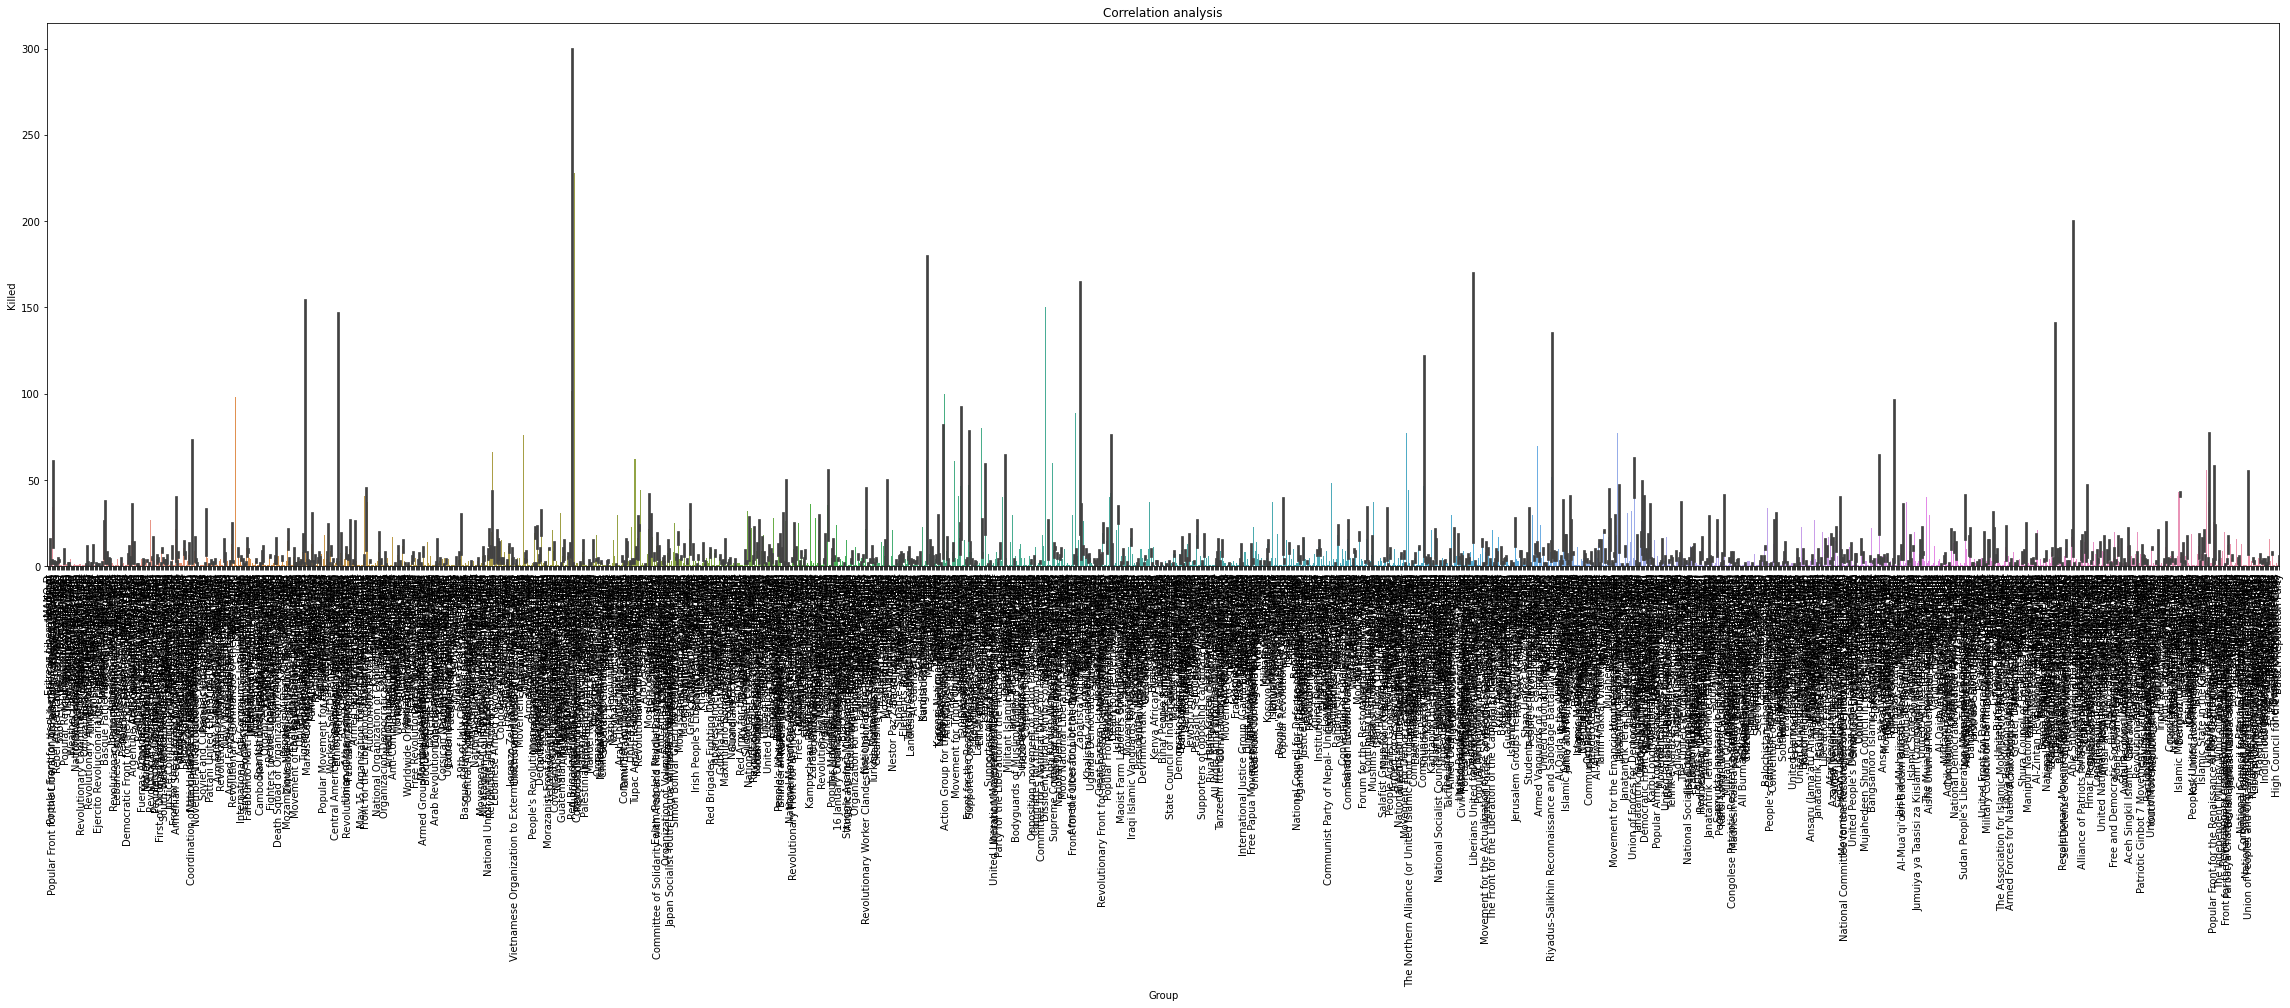

In [ ]:
terror_group = train_data['gname']
killed_number = train_data['nkill']
unique = train_data.nunique()
nkill_group = pd.DataFrame({'Group': terror_group,
                            'Date': train_data['iyear'],
                                 'Killed': killed_number})
nkill_group = nkill_group[nkill_group['Killed']>0]
plt.subplots(figsize=(40,10))
ax = sns.barplot(x=nkill_group['Group'], y=nkill_group['Killed'])
ax.set_title("Correlation analysis")
plt.xticks(rotation=90)
plt.show()

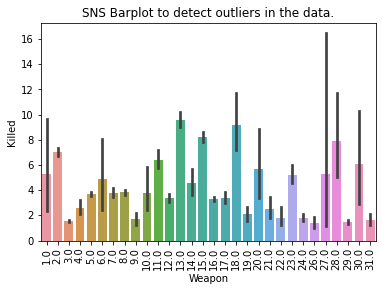

In [ ]:
terror_group = train_data['gname']
killed_number = train_data['nkill']
unique = train_data.nunique()
nkill_group = pd.DataFrame({'Weapon': train_data.weapsubtype1,
                            'Date': train_data['iyear'],
                                 'Killed': killed_number})
nkill_group = nkill_group[nkill_group['Killed']>0]
ax = sns.barplot(x=nkill_group['Weapon'], y=nkill_group['Killed'])
ax.set_title("SNS Barplot to detect outliers in the data.")
plt.xticks(rotation=90)
plt.show()

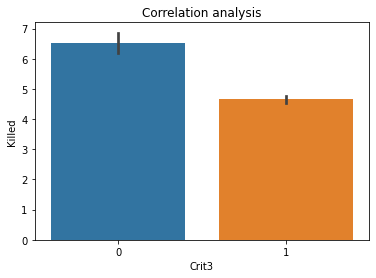

In [ ]:
terror_group = train_data['gname']
killed_number = train_data['nkill']
unique = train_data.nunique()
nkill_group = pd.DataFrame({'Crit3': train_data.crit3,
                            'Date': train_data['iyear'],
                                 'Killed': killed_number})
nkill_group = nkill_group[nkill_group['Killed']>0]
ax = sns.barplot(x=nkill_group['Crit3'], y=nkill_group['Killed'])
ax.set_title("Correlation analysis")
plt.show()

## Data preprocessing 

We have to preprocess our data. Here is the list what we would do.

1.   Detect features with more than 50% NAN values and delete them.
2.   Other features with NAN we would fill with median.
3.   Fixing multicollinearity by removing duplicated columns.



<!-- ### Detecting outliers and removing them. -->


*Those commented code blocks are only for classification whether is there casualities were or no. (1 - casualities, 0 - no casualities)*

In [ ]:
# # nkill outliers removal
# q3 = train_data['nkill'].quantile(0.75)
# q1 = train_data['nkill'].quantile(0.25)
# price_ub = q3 + 1.5*(q3-q1)      # upper bound
# price_lb = q1 - 1.5*(q3-q1)     # lower bound
# df_new2 = train_data[train_data.nkill < price_ub]
# print('removed outliers: ',train_data.shape[0]-df_new2.shape[0])
# print('')
# train_data = df_new2

removed outliers:  30120



In [ ]:
# print("X_train length before: %.2d " % len(train_data))
# print("Avoiding rows with missing values of deaths...")
# train_data = train_data[train_data['nkill'].notnull()]
# train_data['death'] = np.where(train_data.nkill > 0, 1, 0)
# train_data = train_data.drop(['nkill'], axis = 1)
# print("X_train length after: %.2d " % len(train_data))

### Detecting useless features and removing them.

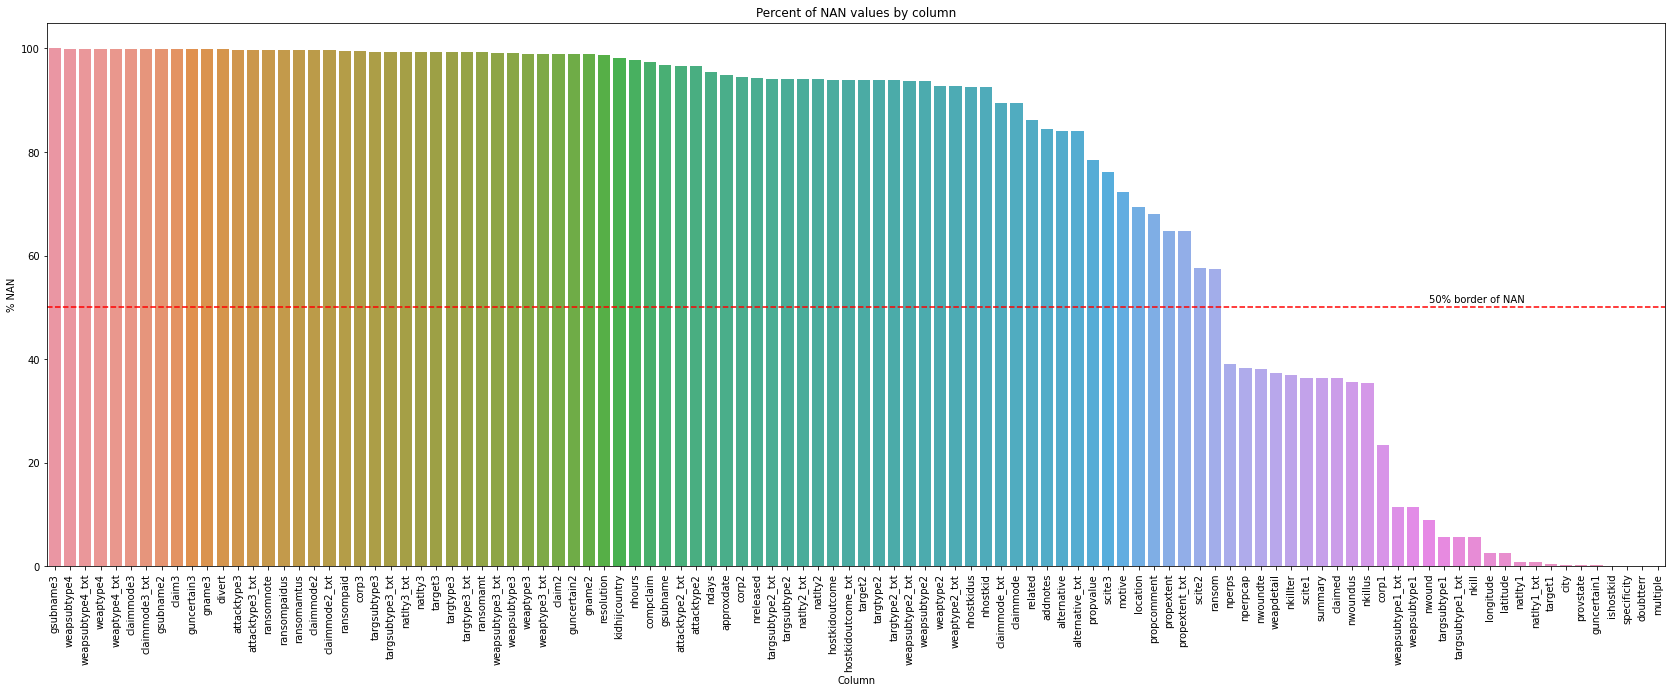

In [ ]:
columns = train_data.columns
percent_missing = train_data.isnull().sum() * 100 / len(train_data)
unique = train_data.nunique()
missing_value_data = pd.DataFrame({'Column': columns,
                                 '% NAN': percent_missing,
                                 'unique': unique})
missing_value_data = missing_value_data[missing_value_data['% NAN']>0]
missing_value_data=missing_value_data.sort_values(by=['% NAN'], ascending=False)
plt.subplots(figsize=(29,10))
ax = sns.barplot(x="Column", y="% NAN", data=missing_value_data)
ax.axhline(50, ls='--', color = 'r')
ax.text(90,51,"50% border of NAN")



ax.set_title("Percent of NAN values by column")
plt.xticks(rotation=90)
plt.show()

# Credits: https://www.kaggle.com/fredericoguerra/predicting-death-occurrence-in-terrorist-attacks

In [ ]:
def missing_values(data,mis_min):
    columns = data.columns
    percent_missing = data.isnull().sum() * 100 / len(data)
    unique = data.nunique()
    missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing,
                                 'unique': unique})
    missing_drop = list(missing_value_data[missing_value_data.percent_missing>mis_min].column_name)
    return(missing_drop)

Number of remaining Features

In [ ]:
print("Number of features before dropping columns with >50%% of NAN: %.1d" % train_data.shape[1])
train_data['natlty1'].fillna(train_data['country'], inplace = True)

missing_drop = missing_values(train_data,50)
train_data = train_data.drop(missing_drop, axis=1)
# train_data = train_data.drop(columns = ['nkillter'])
print("Number of features after dropping columns with >50%% of NAN: %.1d" % train_data.shape[1])

Number of features before dropping columns with >50% of NAN: 134
Number of features after dropping columns with >50% of NAN: 57


### Filling other NAN columns with median and moda values.

In [ ]:
mode_fill = ['nwound','longitude','latitude','weapsubtype1','weapsubtype1_txt','targsubtype1','targsubtype1_txt','natlty1_txt','guncertain1','ishostkid', 'specificity','doubtterr','multiple', 'target1', 'city', 'provstate']
for col in mode_fill:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

train_data['nperps'].fillna(train_data['nperps'].median(), inplace=True)
train_data['nperpcap'].fillna(train_data['nperpcap'].median(), inplace=True)
train_data['nwoundte'].fillna(train_data['nwoundte'].median(), inplace=True)
train_data['nwoundus'].fillna(train_data['nwoundus'].median(), inplace=True)
train_data['nkillus'].fillna(train_data['nkillus'].median(), inplace=True)
train_data['nkill'].fillna(train_data['nkill'].median(), inplace=True)
train_data = train_data.drop(columns = ['weapdetail', 'scite1', 'summary', 'corp1'])
train_data['claimed'].fillna(0, inplace=True)

# Credits: https://www.kaggle.com/fredericoguerra/predicting-death-occurrence-in-terrorist-attacks

In [ ]:
train_data['nkillter'].fillna(train_data['nkillter'].median(), inplace=True)

In [ ]:
print((train_data.isnull().sum(axis=0)/len(train_data)*100).sort_values(ascending=False).head(5))
print("NAN treated")

INT_ANY            0.0
targsubtype1       0.0
targtype1          0.0
attacktype1_txt    0.0
attacktype1        0.0
dtype: float64
NAN treated


### Fixing multicollinearity.

In [ ]:
duplicated_columns = [col for col in train_data.columns if "_txt" in col]
print("There are {} duplicated columns to be removed".format(len(duplicated_columns)))
train_data = train_data.drop(duplicated_columns, axis=1)

There are 8 duplicated columns to be removed


### Hot-encoding categorical features

Specify only categorical objects

In [ ]:
cat_features = train_data.dtypes[train_data.dtypes == 'object'].index
le = LabelEncoder()

for col in cat_features:
    train_data[col] = le.fit_transform(train_data[col])

In [ ]:
train_data.head(1)

,iyear,imonth,iday,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,target1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,0,58,2,211,29806,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,14,68.0,40137,58.0,1907,0.0,0,-99.0,0.0,0.0,13,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,13,0,0,0,0


## Data post-processing

### Finding correlation

**Correlation Matrix**

In [ ]:
corr_matrix = train_data.corr()

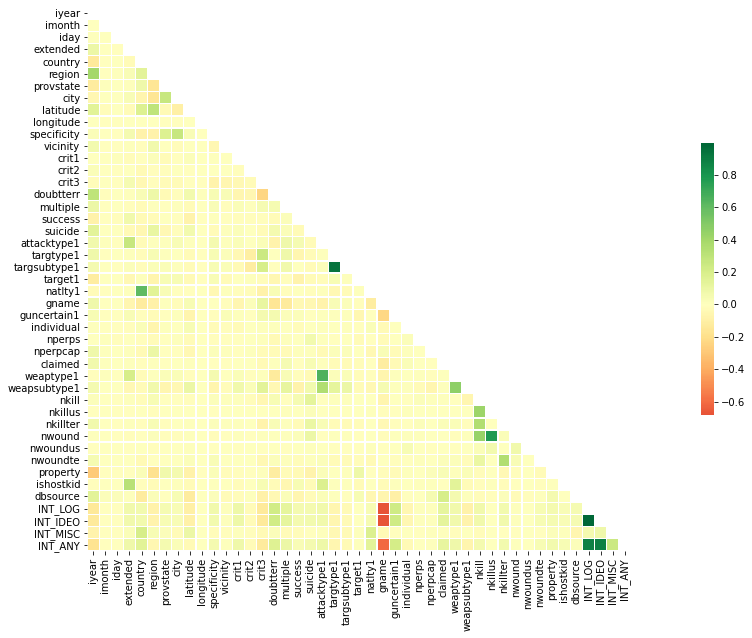

In [ ]:
corr_matrix = train_data.corr()
abs(corr_matrix['nkill']).sort_values(ascending=False).head(10)

mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(25,10))
cmap = sns.diverging_palette(0,240, as_cmap = True)
sns.heatmap(corr_matrix, mask=mask, cmap="RdYlGn", center=0, square=True, linewidths=.3, cbar_kws={"shrink": .5})

train_data[train_data == np.inf] = np.nan
train_data.fillna(train_data.mean(), inplace = True)

In [ ]:
train_data.head(5)

,iyear,imonth,iday,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,target1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,0,58,2,211,29806,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,14,68.0,40137,58.0,1907,0.0,0,-99.0,0.0,0.0,13,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,13,0,0,0,0
197000000002,1970,0,0,0,130,1,782,22166,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,7,45.0,48243,21.0,13,0.0,0,7.0,0.0,0.0,13,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,13,0,1,1,1
197001000001,1970,1,0,0,160,5,2497,34517,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,10,54.0,27324,217.0,3408,0.0,0,-99.0,0.0,0.0,13,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,13,-9,-9,1,1
197001000002,1970,1,0,0,78,8,184,2513,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,7,46.0,75371,217.0,3408,0.0,0,-99.0,0.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,13,-9,-9,1,1
197001000003,1970,1,0,0,101,4,808,11264,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,7,46.0,75350,217.0,3408,0.0,0,-99.0,0.0,0.0,8,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,13,-9,-9,1,1


**Correlation variables**


Creating list with all features in our dataset.

In [ ]:
columnsname = []
for col in train_data.columns: 
    columnsname.append(col)

Calculating correlation by Pearson Coeff.

In [ ]:
posCorr = []
negCorr = []
toDropCorr = []

def calcCorr(var):
  corr, _ = ss.pearsonr(train_data.nkill, train_data[var])
  return corr

for feature in columnsname:
  if calcCorr(feature) > 0.0:
    print('+ {}: {}'.format(feature, calcCorr(feature)))
    posCorr.append(feature)
  elif calcCorr(feature) < -0.015:
    print('- {}: {}'.format(feature, calcCorr(feature)))
  #   toDropCorr.append(feature)
  else:
    # print('- {}: {}'.format(feature, calcCorr(feature))) # uncomment to view negative correlation vars
    negCorr.append(feature)
print(toDropCorr)

+ iyear: 0.021252448922976137
+ imonth: 0.0040308427025958875
+ extended: 0.014585559188971807
+ region: 0.04311345687392926
+ specificity: 0.020225437791503657
+ vicinity: 0.014255546336220556
+ crit1: 0.010253483282935598
- crit2: -0.019545233305462477
- crit3: -0.05132558857653609
+ doubtterr: 0.042644461086238136
+ success: 0.049619145706815956
+ suicide: 0.13638534987905293
+ targtype1: 0.008465891829890083
+ targsubtype1: 0.011512511644966448
+ target1: 0.004474117879486521
+ natlty1: 0.0013392094107510981
- gname: -0.0605680536024056
+ guncertain1: 0.005264833895162061
+ nperps: 0.020269616030955256
+ nperpcap: 0.009192858325222826
+ claimed: 0.012474559243204508
- weapsubtype1: -0.05352713116898321
+ nkill: 0.9999999999999771
+ nkillus: 0.4213375553220616
+ nkillter: 0.3488459146908937
+ nwound: 0.4433261089046217
+ nwoundus: 0.028207402300026576
+ nwoundte: 0.1101131317841979
- property: -0.016815881768641922
- dbsource: -0.019898772443154515
+ INT_LOG: 0.07442413656401398
+ I

In [ ]:
# train_data = train_data.drop(toDropCorr, axis=1) # will have only hard

In [ ]:
# train_data = train_data.drop(negCorr, axis=1) # dropping all negative correlation variables

## Prediction training

Now we can go further in prediction task.

### Preparation

#### Create X, Y variables. Split data.

In [ ]:
# train_data = train_data.drop(insignfeatures, axis=1) # If you are passed PHASE I.

X_train = train_data.drop(['nkill'], axis=1) # all features
y_train = train_data[['nkill']] # target variable



In [ ]:
x_new_train, x_validation, y_new_train, y_validation  = train_test_split(X_train, y_train, shuffle=True, test_size=0.20, random_state=10)
# Show the results of the split
print("Training set has {} samples.".format(x_new_train.shape[0]))
print("Testing set has {} samples.".format(x_validation.shape[0]))

Training set has 145352 samples.
Testing set has 36339 samples.


#### Model performance metrics functions.

In [ ]:
def r2(y_pred):
  r2score = r2_score(y_validation.nkill.values, y_pred)
  return r2score
def rmse(y_pred):
  rmse = sqrt(mean_squared_error(y_validation.nkill.values, y_pred))
  return rmse
def mae(y_pred):
  mae = mean_absolute_error(y_validation.nkill.values, y_pred)
  return mae

### Selecting model

#### Linear Models

Lets try to fit on:


1.   Linear Regression
2.   ElasticNet
3.   Ridge
4.   XGBoost
5.   Catboost


In [ ]:
import xgboost as xgb
pipeline0 = Pipeline(steps=[
    ('scaling', RobustScaler()),
    ('regression', LinearRegression()),
])

pipeline1 = Pipeline(steps=[
    ('scaling', RobustScaler()),
    ('regression', ElasticNet()),
])

pipeline2 = Pipeline(steps=[
    ('scaling', RobustScaler()),
    ('regression', Ridge()),
])

xgboost = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('regression', xgb.XGBRegressor()),
])

catboost = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('regression', CatBoostRegressor(loss_function='RMSE')),
])

In [ ]:
linreg = pipeline0.fit(x_new_train, y_new_train.values.ravel())
elnet = pipeline1.fit(x_new_train, y_new_train)
ridge = pipeline2.fit(x_new_train, y_new_train)
xgbr = xgboost.fit(x_new_train, y_new_train)
cboost = catboost.fit(x_new_train, y_new_train)

[14:55:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.094692
0:	learn: 10.8090679	total: 91.9ms	remaining: 1m 31s
1:	learn: 10.6036270	total: 123ms	remaining: 1m 1s
2:	learn: 10.4205248	total: 154ms	remaining: 51.2s
3:	learn: 10.3169336	total: 195ms	remaining: 48.5s
4:	learn: 10.2206935	total: 228ms	remaining: 45.3s
5:	learn: 10.1282743	total: 263ms	remaining: 43.6s
6:	learn: 9.9673640	total: 295ms	remaining: 41.8s
7:	learn: 9.8917003	total: 326ms	remaining: 40.4s
8:	learn: 9.8144373	total: 360ms	remaining: 39.7s
9:	learn: 9.6962986	total: 401ms	remaining: 39.7s
10:	learn: 9.6304484	total: 434ms	remaining: 39.1s
11:	learn: 9.5472083	total: 470ms	remaining: 38.7s
12:	learn: 9.4897559	total: 507ms	remaining: 38.5s
13:	learn: 9.3788287	total: 539ms	remaining: 37.9s
14:	learn: 9.2961409	total: 573ms	remaining: 37.6s
15:	learn: 9.2074395	total: 609ms	remaining: 37.4s
16:	learn: 9.1617964	total: 6

##### Analyzing performance

In [ ]:
linreg_pred = linreg.predict(x_validation)
elnet_pred = elnet.predict(x_validation)
ridge_pred = ridge.predict(x_validation)
xgb_pred = xgbr.predict(x_validation)
cboost_pred = cboost.predict(x_validation)

print('--- LINEAR REGRESSION --')
print('R2:', r2(linreg_pred))
print('RMSE:', rmse(linreg_pred))
print('MAE:', mae(linreg_pred))
print('Score: ', linreg.score(x_validation, y_validation))
print('--- ELASTIC NET --')
print('R2:', r2(elnet_pred))
print('RMSE:', rmse(elnet_pred))
print('MAE:', mae(elnet_pred))
print('Score: ', elnet.score(x_validation, y_validation))
print('--- RIDGE --')
print('R2:', r2(ridge_pred))
print('RMSE:', rmse(ridge_pred))
print('MAE:', mae(ridge_pred))
print('Score: ', ridge.score(x_validation, y_validation))
print('--- XGBOOST --')
print('R2:', r2(xgb_pred))
print('RMSE:', rmse(xgb_pred))
print('MAE:', mae(xgb_pred))
print('Score: ', xgbr.score(x_validation, y_validation))
print('--- CATBOOST --')
print('R2:', r2(cboost_pred))
print('RMSE:', rmse(cboost_pred))
print('MAE:', mae(cboost_pred))
print('Score: ', cboost.score(x_validation, y_validation))


# --- LINEAR REGRESSION --
# R2: 0.09461617434729896
# RMSE: 11.410605992297297
# MAE: 2.651836115014593
# --- ELASTIC NET --
# R2: 0.06937865041847313
# RMSE: 11.5685479064845
# MAE: 2.7658021007585
# --- RIDGE --
# R2: 0.0946157350540473
# RMSE: 11.4106087605164
# MAE: 2.651809100112943 
# --- XGBOOST --
# R2: 0.1401993042583083
# RMSE: 11.119653124043053
# MAE: 2.292916318196613

--- LINEAR REGRESSION --
R2: 0.13740561285082842
RMSE: 11.137703636335102
MAE: 2.394855045191068
Score:  0.13740561285082842
--- ELASTIC NET --
R2: 0.12238956098975362
RMSE: 11.2342280035333
MAE: 2.458691190738028
Score:  0.1223895609897536
--- RIDGE --
R2: 0.13740489587674654
RMSE: 11.137708265070982
MAE: 2.394782957985004
Score:  0.13740489587674654
--- XGBOOST --
R2: 0.17460511659403322
RMSE: 10.894899533513026
MAE: 2.0558327427097782
Score:  0.17460511659403322
--- CATBOOST --
R2: 0.20096912055181537
RMSE: 10.719490045712275
MAE: 1.9611948870075855
Score:  -43944.64240955763



Both **Linear regression** and **Ridge** have the almost same result in each case.

**Elastic Net** performed pretty bad.

Best are **Gradient Boost** models.

##### Importance Coefficients

Let's analyze some importance coefficients from Linear Regression model.

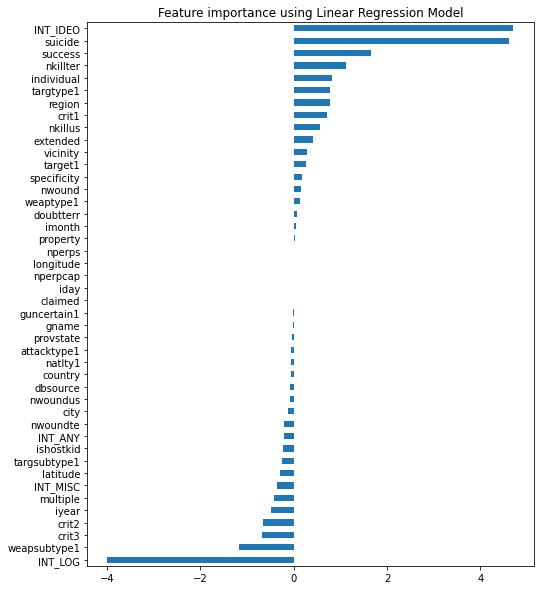

In [ ]:
importance = linreg['regression'].coef_
coef = pd.Series(importance, index = x_new_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.show()

# Credits: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

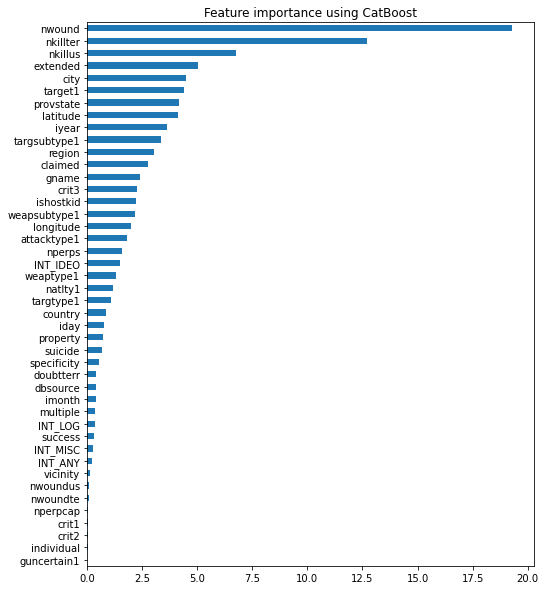

In [ ]:
importance = catboost['regression'].feature_importances_
coef = pd.Series(importance, index = x_new_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using CatBoost")
plt.show()

# Credits: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

Let's select negative importance features and add to list.



In [ ]:
# insignfeatures = coef[coef>1.5].keys().to_list()

##### Cross-validation

In [ ]:

cv_scores = cross_val_score(pipeline0, x_new_train, y_new_train, cv=5, scoring='neg_mean_squared_error')
print('--- LINEAR REGRESSION ---')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))
cv_scores = cross_val_score(pipeline1, x_new_train, y_new_train, cv=5, scoring='neg_mean_squared_error')
print('--- ELASTIC NET ---')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))
cv_scores = cross_val_score(pipeline2, x_new_train, y_new_train, cv=5, scoring='neg_mean_squared_error')
print('--- RIDGE ---')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))
cv_scores = cross_val_score(xgboost, x_new_train, y_new_train, cv=5, scoring='neg_mean_squared_error')
print('--- XGBOOST ---')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

--- LINEAR REGRESSION ---
Cross validation scores:
	 -76.9109
	-2151611.6304
	-54.3330
	-134.5625
	-116.5931
Mean CV MSE = 430398.8060
--- ELASTIC NET ---
Cross validation scores:
	 -79.2184
	-66.8226
	-56.6055
	-137.2761
	-128.2448
Mean CV MSE = 93.6335
--- RIDGE ---
Cross validation scores:
	 -76.9104
	-2154097.3636
	-54.3328
	-134.5627
	-116.5943
Mean CV MSE = 430895.9527
[10:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:s

I will pretend that I understand what those numbers means.

#### Tree/Ensemble Models

Let's test forest and trees models *(because I love them)*

In [ ]:
pipeline3 = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('regression', RandomForestRegressor()),
])

pipeline4 = Pipeline(steps=[
    ('scaling', RobustScaler()),
    ('regression', DecisionTreeRegressor()),
])

pipeline5 = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('regression', ExtraTreesRegressor()),
])

pipeline6 = Pipeline(steps=[
    ('scaling', RobustScaler()),
    ('regression', ExtraTreeRegressor()),
])

In [ ]:
# # this can take a while
rfr = pipeline3.fit(x_new_train, y_new_train.values.ravel())
dtr = pipeline4.fit(x_new_train, y_new_train.values.ravel())
etr = pipeline5.fit(x_new_train, y_new_train.values.ravel())
etr1 = pipeline6.fit(x_new_train, y_new_train.values.ravel())

##### Analyzing performance

In [ ]:
rfr_pred = rfr.predict(x_validation)
dtr_pred = dtr.predict(x_validation)
etr_pred = etr.predict(x_validation)
etr1_pred = etr1.predict(x_validation)

print('--- RANDOM FOREST REGRESSOR --')
print('R2:', r2(rfr_pred))
print('RMSE:', rmse(rfr_pred))
print('MAE:', mae(rfr_pred))
print('--- DECISION TREE REGRESSOR --')
print('R2:', r2(dtr_pred))
print('RMSE:', rmse(dtr_pred))
print('MAE:', mae(dtr_pred))
print('--- EXTRA TREES REGRESSOR --')
print('R2:', r2(etr_pred))
print('RMSE:', rmse(etr_pred))
print('MAE:', mae(etr_pred))
print('--- EXTRA TREE REGRESSOR --')
print('R2:', r2(etr1_pred))
print('RMSE:', rmse(etr1_pred))
print('MAE:', mae(etr1_pred))


### Predicting IF there ANY casualities
# --- RANDOM FOREST REGRESSOR --
# R2: 0.573627499733657
# RMSE: 0.32171241822563423
# MAE: 0.20772699515238727
# --- DECISION TREE REGRESSOR --
# R2: 0.1720425793492435
# RMSE: 0.44830876865608205
# MAE: 0.20135233606534944
# --- EXTRA TREES REGRESSOR --
# R2: 0.5772442641497091
# RMSE: 0.32034502696800216
# MAE: 0.20272288702510124

### Predicting NUMBER of CASUALITIES
# --- RANDOM FOREST REGRESSOR --
# R2: 0.15301630616063233
# RMSE: 11.036461897988588
# MAE: 2.0782358562108105
# --- DECISION TREE REGRESSOR --
# R2: -0.6171705698212835
# RMSE: 15.250014555531218
# MAE: 2.5235612798136966
# --- EXTRA TREES REGRESSOR --
# R2: 0.1734986482349814
# RMSE: 10.902199569274352
# MAE: 2.0319355738827145
# --- EXTRA TREE REGRESSOR --
# R2: -1.0258627139000196
# RMSE: 17.068578319522814
# MAE: 2.589912989049085

# --- RANDOM FOREST REGRESSOR --
# R2: 0.1573059421690205
# RMSE: 11.008478774109527
# MAE: 2.074511835176415
# --- DECISION TREE REGRESSOR --
# R2: -0.691387832848265
# RMSE: 15.596025789569822
# MAE: 2.5403141715645248
# --- EXTRA TREES REGRESSOR --
# R2: 0.18371993756252392
# RMSE: 10.834576443924918
# MAE: 2.025927756183662
# --- EXTRA TREE REGRESSOR --
# R2: -0.2611308524632183
# RMSE: 13.467048333879235
# MAE: 2.5813352169536476

--- RANDOM FOREST REGRESSOR --
R2: 0.157322439102216
RMSE: 11.008371020277611
MAE: 2.0706329092734745
--- DECISION TREE REGRESSOR --
R2: -0.5657991725186706
RMSE: 15.005842133301872
MAE: 2.509692014338718
--- EXTRA TREES REGRESSOR --
R2: 0.1700043984421844
RMSE: 10.925221206958684
MAE: 2.030397753002899
--- EXTRA TREE REGRESSOR --
R2: -0.4628676029003267
RMSE: 14.504235899945007
MAE: 2.5310238773902216


RFR and ETR showed the best results, while DTR is now leader of the worse result.

I will select only **Extra Trees Regressor** because I do not want to spent decade for  training/optimizition/cross-validation of *all* models.

Only linear models have importance coefficients, so for this section we would skip importance features.

##### Cross-validation

In [ ]:

cv_scores = cross_val_score(pipeline5, x_new_train, y_new_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print('--- Extra Trees Regressor ---')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

--- Extra Trees Regressor ---
Cross validation scores:
	 -61.4813
	-57.1560
	-78.6674
	-128.1803
	-110.4348
Mean CV MSE = 87.1840


hell that took long time. 

In [ ]:
cv_scores.mean()


### Predicting IF there ANY casualities
# -0.1032874785229138 
### Predicting NUMBER of CASUALITIES
# -84.19626792129837

-87.18396739234156

#### Deep Sequential Neural Network

Last model that we would test would be NN.

Lets specify our checkpoints.

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Now we will create model with 4 layers:


In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_new_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               5632      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 236,289
Trainable params: 236,289
Non-trainable params: 0
________________________________________________

I will train Neural Network for 10 epochs because I dont have time to wait.

In [ ]:
from sklearn.preprocessing import RobustScaler
nn_x = x_new_train
nn_y = ｙ_new_train

scaler = MinMaxScaler()
nn_traindata = scaler.fit_transform(nn_x, nn_y)
history = NN_model.fit(x_new_train, y_new_train, epochs=10, batch_size=64, validation_split = 0.19, callbacks=callbacks_list)

Train on 117735 samples, validate on 27617 samples
Epoch 1/10
117735/117735 [==============================] - 13s 107us/step - loss: 2.3420 - mean_absolute_error: 2.3420 - val_loss: 2.2514 - val_mean_absolute_error: 2.2514

Epoch 00001: val_loss did not improve from 2.24286
Epoch 2/10
117735/117735 [==============================] - 12s 106us/step - loss: 7.7330 - mean_absolute_error: 7.7330 - val_loss: 2.2514 - val_mean_absolute_error: 2.2514

Epoch 00002: val_loss did not improve from 2.24286
Epoch 3/10
117735/117735 [==============================] - 13s 106us/step - loss: 2.2542 - mean_absolute_error: 2.2541 - val_loss: 2.2515 - val_mean_absolute_error: 2.2515

Epoch 00003: val_loss did not improve from 2.24286
Epoch 4/10
117735/117735 [==============================] - 12s 104us/step - loss: 15.0232 - mean_absolute_error: 15.0232 - val_loss: 2.2514 - val_mean_absolute_error: 2.2514

Epoch 00004: val_loss did not improve from 2.24286
Epoch 5/10
117735/117735 [=====================

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


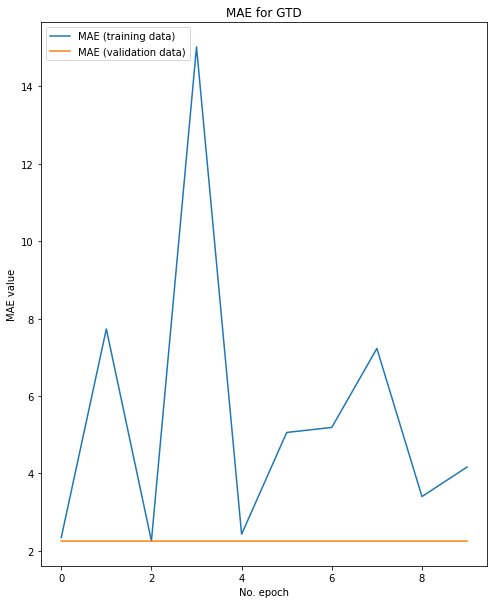

In [ ]:
# Plot history: MAE
plt.plot(history.history['mean_absolute_error'], label='MAE (training data)')
plt.plot(history.history['val_mean_absolute_error'], label='MAE (validation data)')
plt.title('MAE for GTD')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

From this graph we can see that loss for training data is going down. That's good.

But why loss for training data is so stale?

IDK

In [ ]:
# Loading best weights.
weights = 'Weights-004--2.25121.hdf5' # choose the best checkpoint 
NN_model.load_weights(weights) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

##### Analyzing performance

In [ ]:
NN_model_pred = NN_model.predict(x_validation)

print('--- SEQUENTIAL NEURAL NETWORK --')
print('R2:', r2(NN_model_pred))
print('RMSE:', rmse(NN_model_pred))
print('MAE:', mae(NN_model_pred))

### Predicting IF there ANY casualities
# --- SEQUENTIAL NEURAL NETWORK --
# R2: -0.7086027085974995
# RMSE: 0.6440117294664034
# MAE: 0.41482844638108096
### Predicting NUMBER of CASUALITIES
# --- SEQUENTIAL NEURAL NETWORK --
# R2: -0.03780720559109341
# RMSE: 12.216609287430513
# MAE: 2.332767078170024

--- SEQUENTIAL NEURAL NETWORK --
R2: -0.035031634084082164
RMSE: 12.200261947451507
MAE: 2.324204139227512


Really bad score. But experiment was fun, tho

### Choosing best model

GRADIENT BOOSTING


---



--- XGBOOST --<br>
R2: 0.17460511659403322<br>
RMSE: 10.894899533513026<br>
MAE: 2.0558327427097782<br>
Score:  0.17460511659403322<br>
--- CATBOOST --<br>
R2: 0.20096912055181537<br>
RMSE: 10.719490045712275<br>
MAE: 1.9611948870075855<br>
Score:  -43944.64240955763<br>

LINEAR MODELS


---



**LINEAR REGRESSION**

R2: 0.0946<br>
RMSE: 11.4106<br>
MAE: 2.6518</br>

**ELASTIC NET**

R2: 0.0693<br>
RMSE: 11.5685<br>
MAE: 2.7658<br>

**RIDGE**

R2: 0.0946<br>
RMSE: 11.4106<br>
MAE: 2.6518<br>

FOREST AND TREE


---



**RANDOM FOREST REGRESSOR**

R2: 0.1530<br>
RMSE: 11.0364<br>
MAE: 2.0782<br>
**DECISION TREE REGRESSOR**

R2: -0.6171</br>
RMSE: 15.2500</br>
MAE: 2.5235</br>

**EXTRA TREES REGRESSOR**

R2: 0.1734</br>
RMSE: 10.9021</br>
MAE: 2.0319</br>

NEURAL NETWORK


---



**SEQUENTIAL NEURAL NETWORK**

R2: -0.0378</br>
RMSE: 12.2166</br>
MAE: 2.3327</br>

We can see that in terms of predicting number casualities best model is **CatBoostRegressor**

#### Best Model: CatBoostRegressor

Current model parameters.

In [ ]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(catboost['regression'].get_params())

Parameters currently in use:

{'loss_function': 'RMSE'}


Grid Search

In [ ]:
# Lite (result): {'depth': 6, 'iterations': 100, 'learning_rate': 0.1} 
# best: 12.7662241 (8)
parameters = {'depth'         : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]}
pprint(parameters)

{'depth': [6, 8, 10],
 'iterations': [30, 50, 100],
 'learning_rate': [0.01, 0.05, 0.1]}


In [ ]:
parameters = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [ ]:
grid_search_result = catboost['regression'].grid_search(parameters, 
                                       X=x_new_train, 
                                       y=y_new_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 12.61208991
bestIteration = 99

0:	loss: 12.6120899	best: 12.6120899 (0)	total: 2.75s	remaining: 1m 19s

bestTest = 12.12131696
bestIteration = 99

1:	loss: 12.1213170	best: 12.1213170 (1)	total: 5.26s	remaining: 1m 13s

bestTest = 12.8048503
bestIteration = 99

2:	loss: 12.8048503	best: 12.1213170 (1)	total: 7.58s	remaining: 1m 8s

bestTest = 12.17655299
bestIteration = 97

3:	loss: 12.1765530	best: 12.1213170 (1)	total: 10s	remaining: 1m 5s

bestTest = 12.95979305
bestIteration = 99

4:	loss: 12.9597930	best: 12.1213170 (1)	total: 12.3s	remaining: 1m 1s

bestTest = 12.40375268
bestIteration = 98

5:	loss: 12.4037527	best: 12.1213170 (1)	total: 14.8s	remaining: 59.1s

bestTest = 13.06096475
bestIteration = 99

6:	loss: 13.0609647	best: 12.1213170 (1)	total: 17.1s	remaining: 56.1s

bestTest = 12.47908766
bestIteration = 98

7:	loss: 12.4790877	best: 12.1213170 (1)	total: 19.5s	remaining: 53.5s

bestTest = 13.06459481
bestIteration = 99

8:	loss: 13.0645948	best: 12.1213170 

CatBoostError: ignored

In [ ]:
grid_search_result['params']

{'depth': 6, 'iterations': 100, 'learning_rate': 0.1}

In [ ]:
pipeline5 = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('regression', ExtraTreesRegressor(bootstrap='False', max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
])

In [ ]:
etrr = pipeline5.fit(x_new_train, y_new_train.values.ravel())

In [ ]:
model_final = pipeline5.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred = etrr.predict(x_validation)

print('--- EXTRA TREES REGRESSOR --')
print('R2:', r2(y_pred))
print('RMSE:', rmse(y_pred))
print('MAE:', mae(y_pred))


--- EXTRA TREES REGRESSOR --
R2: 0.12611443676184153
RMSE: 11.210361719255298
MAE: 2.3989880020238505


However, we would not do take those params because for some reason hyperparameters it has found are worse than the default ones.

# Conclusion. Tips & Interesting observations



-   Classification task of predicting if there any casualities are succesful with more than 80% accuracy.
-   weaponsubtype1 have negative interrelationship with nkill variable.
-   Regression task is kinda bad.
-   I still don't know how important features work
-   How do I hyperoptimize with confusion matrix?
-   Trees and Ensemble regressors are immune to multicollinearity
-   I know that I know nothing for Neural Networks



## Experiments

### Testing feature importances (dropping one unimportant feature)

Let's drop the most unimportant feature and test perfomance.

In [ ]:
new_train_data = train_data.drop('INT_LOG', axis=1)

In [ ]:
new_X_train = new_train_data.drop(['nkill'], axis=1) # all features
new_y_train = new_train_data[['nkill']] # target variable

new_x_new_train, new_x_validation, new_y_new_train, new_y_validation  = train_test_split(new_X_train, new_y_train, shuffle=True, test_size=0.20, random_state=10)
# Show the results of the split
print("Training set has {} samples.".format(x_new_train.shape[0]))
print("Testing set has {} samples.".format(x_validation.shape[0]))

Training set has 145352 samples.
Testing set has 36339 samples.


In [ ]:
etr_test = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('regression', ExtraTreesRegressor()),
])

In [ ]:
y_pred = etr_test.fit(new_x_new_train, new_y_new_train.values.ravel())

In [ ]:
model_final_pred = y_pred.predict(new_x_validation)
print('--- EXTRA TREES REGRESSOR --')
print('R2:', r2(model_final_pred))
print('RMSE:', rmse(model_final_pred))
print('MAE:', mae(model_final_pred))

# --- EXTRA TREES REGRESSOR --
# R2: 0.17369803098575343
# RMSE: 10.900884482707559
# MAE: 2.024889929171793

--- EXTRA TREES REGRESSOR --
R2: 0.17369803098575343
RMSE: 10.900884482707559
MAE: 2.024889929171793


Removing unsignificant feature results in worse performance. 

### Classification Task

In [ ]:
from sklearn.ensemble import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel


xgboostc = Pipeline(steps=[
    ('ohe_and_scaling', StandardScaler()),
    ('classifier', xgb.XGBClassifier()),
])


rfc = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('regression', RandomForestClassifier()),
])

ridgec = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('classifier', RidgeClassifier()),
])

sgdc = Pipeline(steps=[
    ('ohe_and_scaling', StandardScaler()),
    ('classifier', SGDClassifier()),
])

etc = Pipeline(steps=[
    ('ohe_and_scaling', StandardScaler()),
    ('classifier', ExtraTreesClassifier()),
])

ridgeclass = ridgec.fit(x_new_train, y_new_train.values.ravel())
sgdclass = sgdc.fit(x_new_train, y_new_train.values.ravel())
etcclass = etc.fit(x_new_train, y_new_train.values.ravel())
xgboostclass = xgboostc.fit(x_new_train, y_new_train.values.ravel())
rfclass = rfc.fit(x_new_train, y_new_train.values.ravel())

In [ ]:
from sklearn.metrics import accuracy_score
rfcc_score = rfclass.predict(x_validation)
ridgec_score = ridgeclass.predict(x_validation)
sgdc_score = sgdclass.predict(x_validation)
etcc_score = etcclass.predict(x_validation)
xgboostc_score = xgboostclass.predict(x_validation)
print('RandomForestClassifier:', accuracy_score(y_validation, rfcc_score))
print('RidgeClassifier:', accuracy_score(y_validation, ridgec_score))
print('SGD Classifier:', accuracy_score(y_validation, sgdc_score))
print('ExtraTreesClassifier:', accuracy_score(y_validation, etcc_score))
print('XGBoostClassifier:', accuracy_score(y_validation, xgboostc_score))